### Done by:
#### ML Engineer: Ali Saoud
Mob.: +218919049022
Tripoli, Libya.

____________________________________________________________________________________________

### Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras, for AH-23 Well, Gialo oil field, Zueitina oil co., libya, (12 Aug 2020).

#### Problem Description


The problem is predicting oil prediction for a well, based on historical data provided by Zueitina oil co., Tripoli, libya.



Loading data using Pandas:
Once loaded we can easily plot the whole dataset.

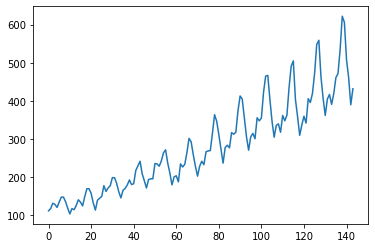

In [7]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('oil-production.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

### Long Short-Term Memory Network

The Long Short-Term Memory network, or LSTM network, is a recurrent neural network that is trained using Backpropagation Through Time and overcomes the vanishing gradient problem.

#### LSTM Network for Regression

In [8]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

#### Fixing random seed:

In [9]:
numpy.random.seed(7)

#### Extracting the NumPy array from the dataframe and convert the integer values to floating point values, which are more suitable for modeling with a neural network.

In [10]:
dataframe = pandas.read_csv('oil-production.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

#### Normalizing data:

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

#### Separating the data into the training datasets with 67% of the observations that we can use to train our model, leaving the remaining 33% for testing the model.

In [12]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


#### Creating a new dataset

In [13]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [14]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [15]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

#### design and fit  LSTM network for this problem.

In [16]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 0s - loss: 0.0625
Epoch 2/100
94/94 - 0s - loss: 0.0343
Epoch 3/100
94/94 - 0s - loss: 0.0247
Epoch 4/100
94/94 - 0s - loss: 0.0216
Epoch 5/100
94/94 - 0s - loss: 0.0203
Epoch 6/100
94/94 - 0s - loss: 0.0192
Epoch 7/100
94/94 - 0s - loss: 0.0181
Epoch 8/100
94/94 - 0s - loss: 0.0171
Epoch 9/100
94/94 - 0s - loss: 0.0157
Epoch 10/100
94/94 - 0s - loss: 0.0144
Epoch 11/100
94/94 - 0s - loss: 0.0127
Epoch 12/100
94/94 - 0s - loss: 0.0110
Epoch 13/100
94/94 - 0s - loss: 0.0092
Epoch 14/100
94/94 - 0s - loss: 0.0075
Epoch 15/100
94/94 - 0s - loss: 0.0060
Epoch 16/100
94/94 - 0s - loss: 0.0048
Epoch 17/100
94/94 - 0s - loss: 0.0039
Epoch 18/100
94/94 - 0s - loss: 0.0031
Epoch 19/100
94/94 - 0s - loss: 0.0026
Epoch 20/100
94/94 - 0s - loss: 0.0024
Epoch 21/100
94/94 - 0s - loss: 0.0022
Epoch 22/100
94/94 - 0s - loss: 0.0021
Epoch 23/100
94/94 - 0s - loss: 0.0021
Epoch 24/100
94/94 - 0s - loss: 0.0020
Epoch 25/100
94/94 - 0s - loss: 0.0020
Epoch 26/100
94/94 - 0s - loss: 0.

Once the model is fit, I can estimate the performance of the model on the train and test datasets. This will give me a point of comparison for new models.
The production data is in units (a thousand barrels per month)

In [17]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.76 RMSE
Test Score: 49.11 RMSE


#### generating predictions using the model for both the train and test dataset to get a visual indication of the skill of the model.

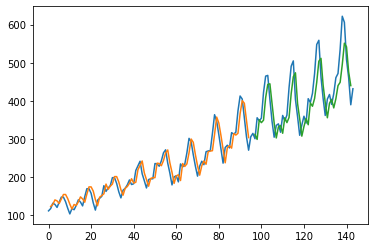

In [18]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

the model did an excellent job of fitting both the training and the test datasets.

#### The model has an average error of about 23 barrels of oil (in thousands) on the training dataset, and about 52 barrels (in thousands) on the test dataset.

## The model is ready for future predictions and analysis.